In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
df=pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [22]:
df.shape

(581012, 55)

In [23]:
df.columns.tolist()

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [25]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [26]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [27]:
df.nunique

<bound method DataFrame.nunique of         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0           

In [28]:
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]



In [29]:
print("Skewness before transformation:")
for col in continuous_cols:
    print(f"{col}: {df[col].skew():.2f}")



Skewness before transformation:
Elevation: -0.82
Aspect: 0.40
Slope: 0.79
Horizontal_Distance_To_Hydrology: 1.14
Vertical_Distance_To_Hydrology: 1.79
Horizontal_Distance_To_Roadways: 0.71
Hillshade_9am: -1.18
Hillshade_Noon: -1.06
Hillshade_3pm: -0.28
Horizontal_Distance_To_Fire_Points: 1.29


In [30]:
skewed_cols = [col for col in continuous_cols if abs(df[col].skew()) > 0.5]

if len(skewed_cols) > 0:
    pt = PowerTransformer(method='yeo-johnson')
    df[skewed_cols] = pt.fit_transform(df[skewed_cols])
    print("\nSkewness after transformation:")
    for col in skewed_cols:
        print(f"{col}: {df[col].skew():.2f}")
else:
    print("\nNo skewed columns found.")


Skewness after transformation:
Elevation: -0.04
Slope: -0.01
Horizontal_Distance_To_Hydrology: -0.10
Vertical_Distance_To_Hydrology: 0.33
Horizontal_Distance_To_Roadways: -0.07
Hillshade_9am: -0.15
Hillshade_Noon: -0.08
Horizontal_Distance_To_Fire_Points: 0.00


Distributions before


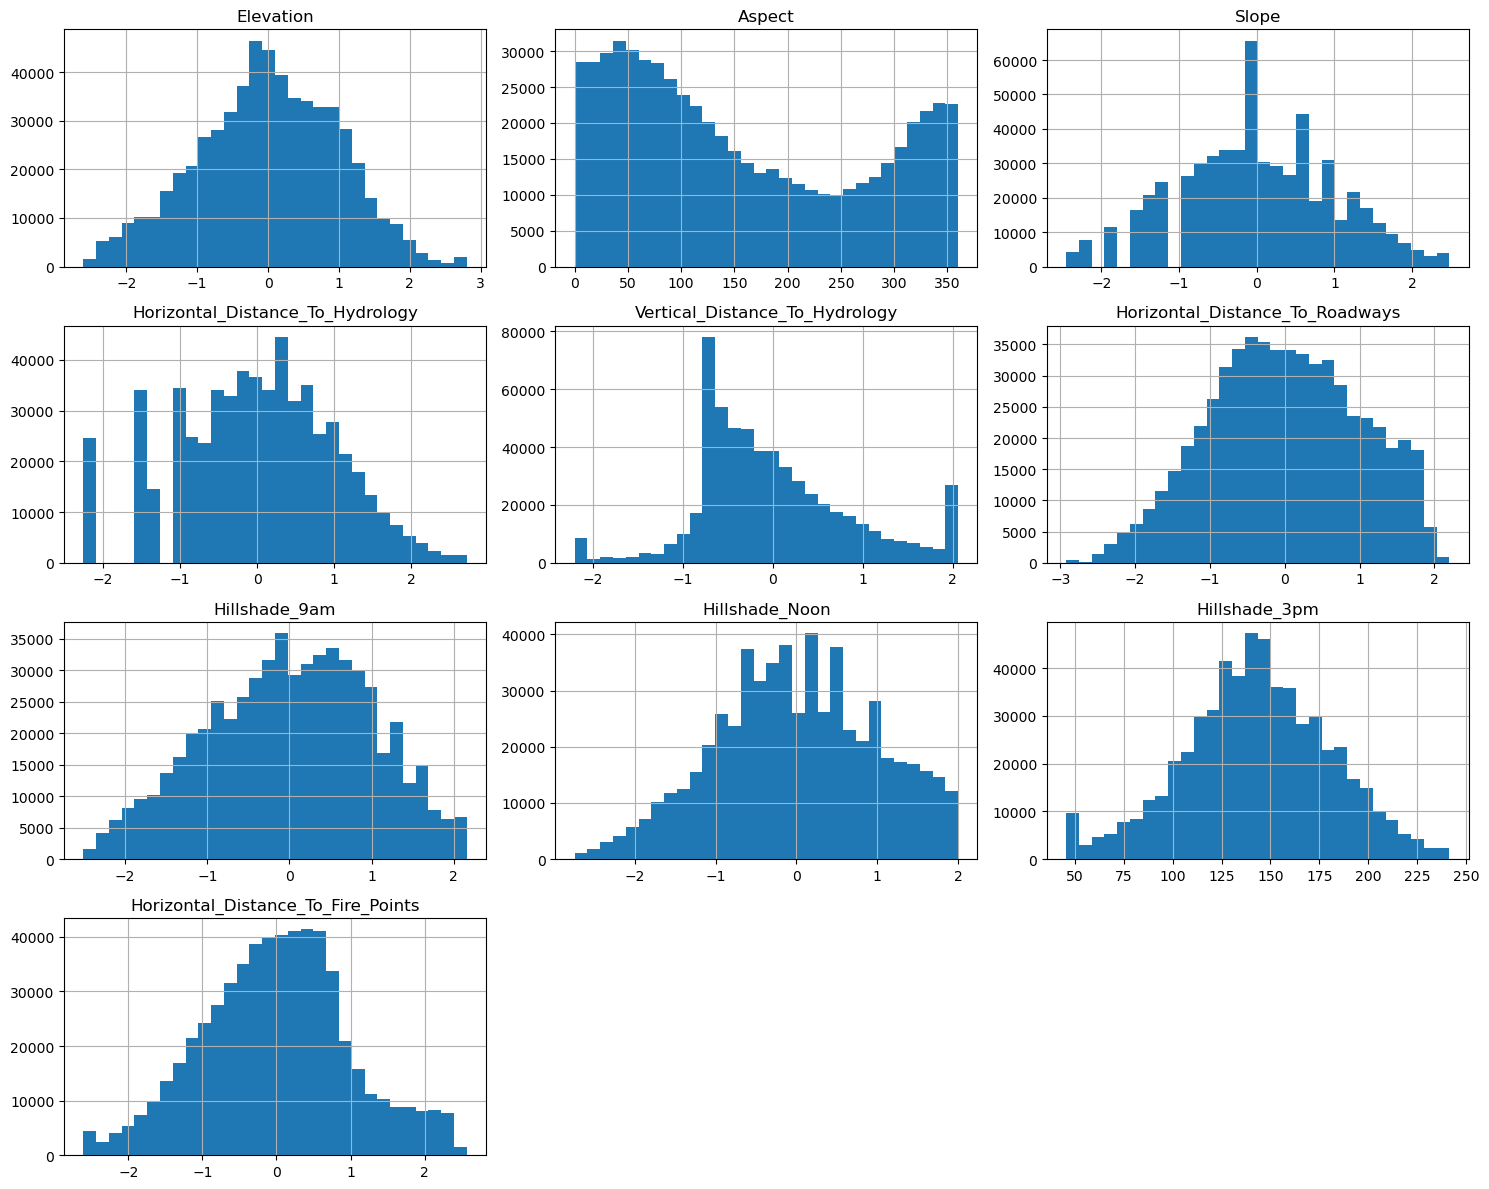

In [51]:
print("Distributions before")
df[continuous_cols].hist(figsize=(15, 12), bins=30, layout=(4, 3))
plt.tight_layout()
plt.show()

Distributions after


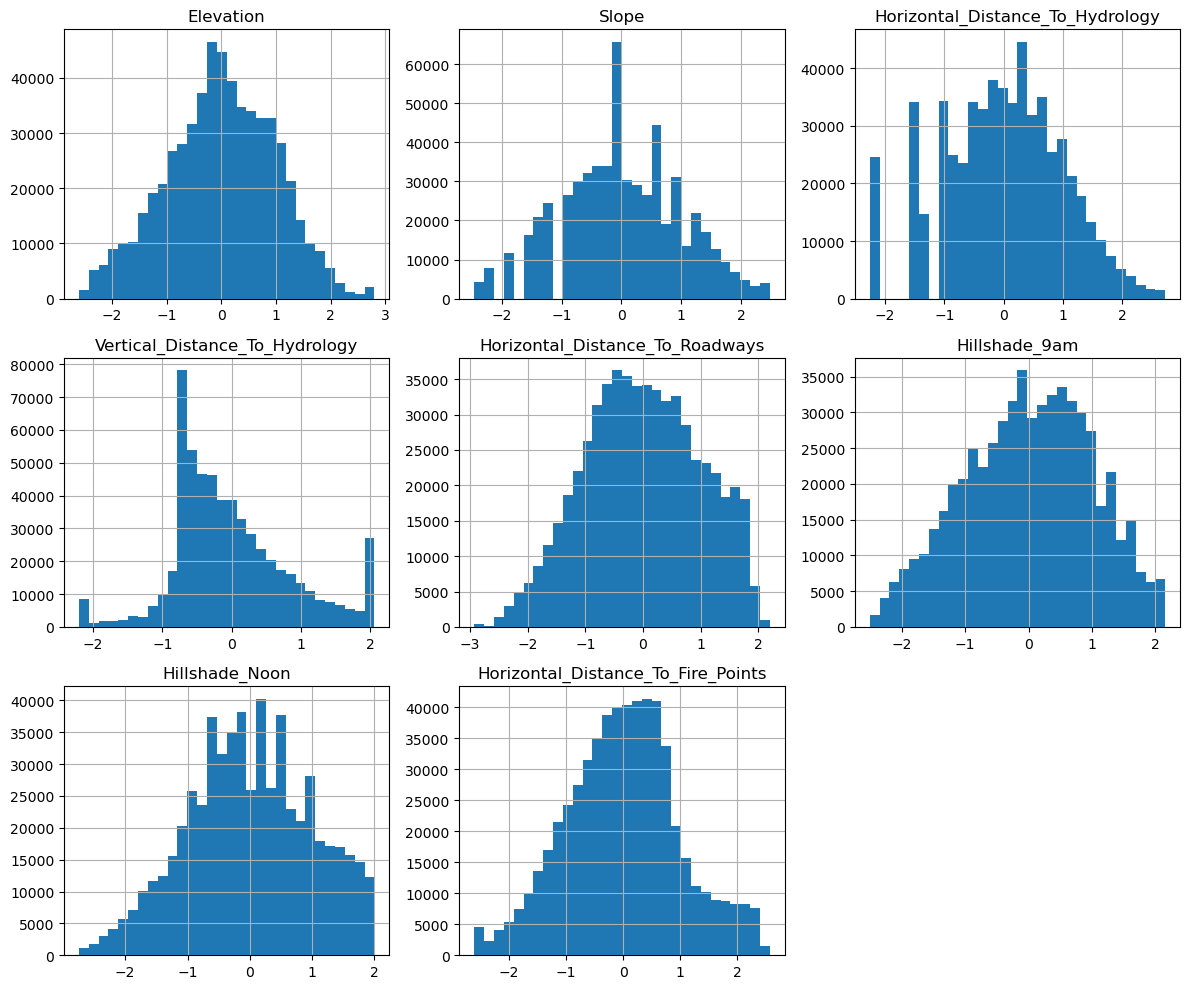

In [52]:
print("Distributions after")
df[skewed_cols].hist(figsize=(12, 10), bins=30, layout=(3, 3))
plt.tight_layout()
plt.show()

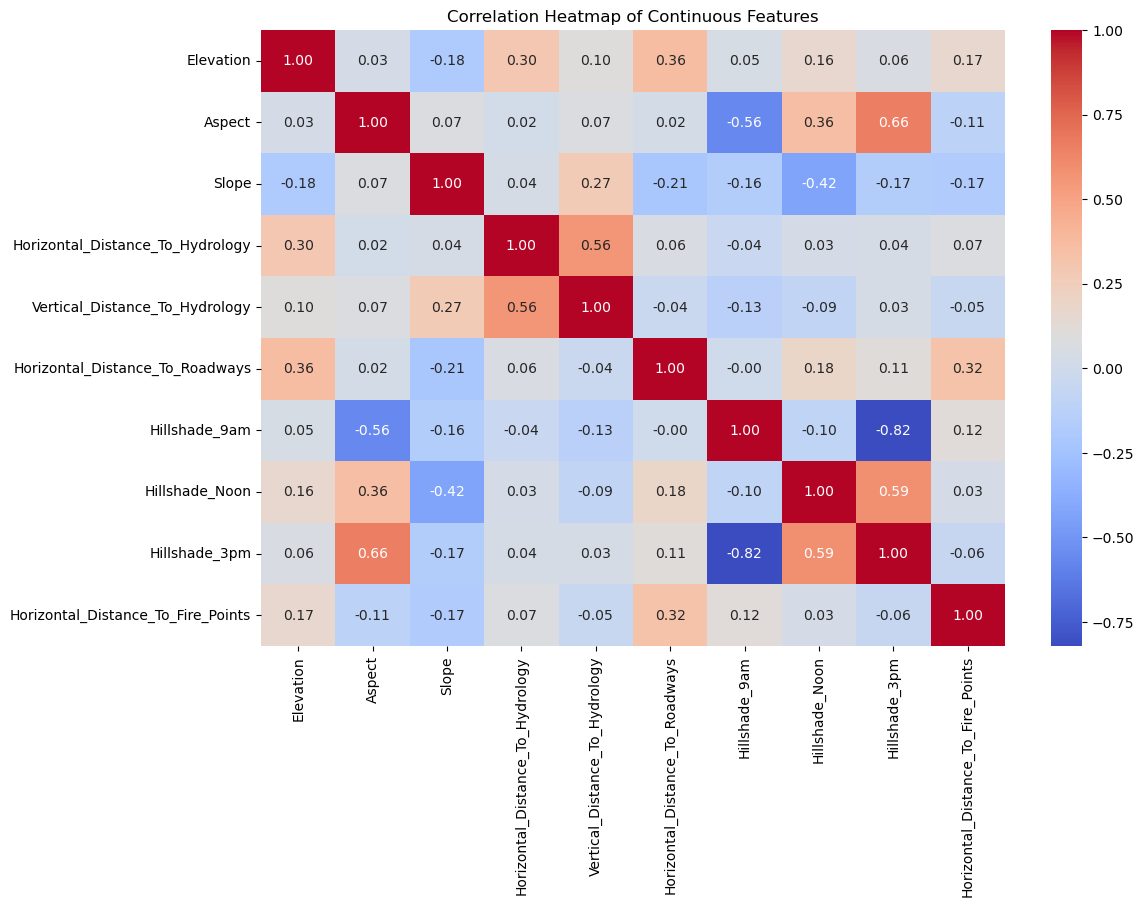

In [44]:
plt.figure(figsize=(12, 8))
corr_matrix = df[continuous_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

In [31]:
print("outliers before:")
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers}")

outliers before:
Elevation: 1459
Aspect: 0
Slope: 6494
Horizontal_Distance_To_Hydrology: 583
Vertical_Distance_To_Hydrology: 29825
Horizontal_Distance_To_Roadways: 124
Hillshade_9am: 0
Hillshade_Noon: 267
Hillshade_3pm: 7832
Horizontal_Distance_To_Fire_Points: 2538


In [32]:
print("outliers after:")
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers}")

outliers after:
Elevation: 0
Aspect: 0
Slope: 0
Horizontal_Distance_To_Hydrology: 0
Vertical_Distance_To_Hydrology: 0
Horizontal_Distance_To_Roadways: 0
Hillshade_9am: 0
Hillshade_Noon: 0
Hillshade_3pm: 0
Horizontal_Distance_To_Fire_Points: 0


C:\Users\ruthr\AppData\Local\Temp\ipykernel_19636\1618316323.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower, col] = lower


In [33]:
y = df['Cover_Type']  
X = df.drop('Cover_Type', axis=1)  
print(y.value_counts())


Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


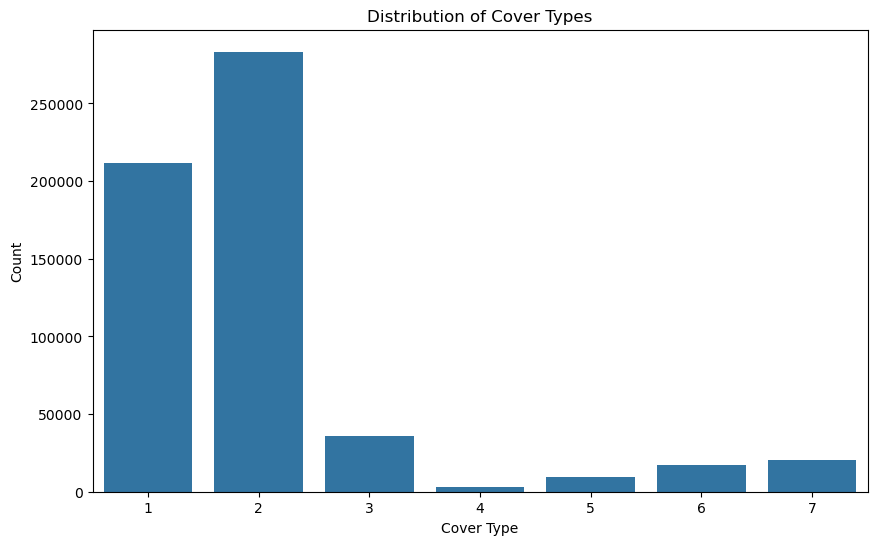

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (464809, 54)
Test shape: (116203, 54)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit


scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

le = LabelEncoder()
y_enc = le.fit_transform(y)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y_enc):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]

sample_size = int(0.2 * len(X_train))
sss_sample = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=42)
for sample_idx, _ in sss_sample.split(X_train, y_train):
    X_sample = X_train.iloc[sample_idx]
    y_sample = y_train[sample_idx]

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=20, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        random_state=42,
        tree_method='hist',
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train) 
    else:
        model.fit(X_sample, y_sample) 

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append([name, acc, prec, rec, f1])
    print(f"{name}:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}\n")

Logistic Regression:
  Accuracy : 0.6037
  Precision: 0.7032
  Recall   : 0.6037
  F1-score : 0.6324

Decision Tree:
  Accuracy : 0.8342
  Precision: 0.8481
  Recall   : 0.8342
  F1-score : 0.8389

Random Forest:
  Accuracy : 0.9091
  Precision: 0.9097
  Recall   : 0.9091
  F1-score : 0.9080

Naive Bayes:
  Accuracy : 0.0945
  Precision: 0.4796
  Recall   : 0.0945
  F1-score : 0.0595

XGBoost:
  Accuracy : 0.8126
  Precision: 0.8130
  Recall   : 0.8126
  F1-score : 0.8097



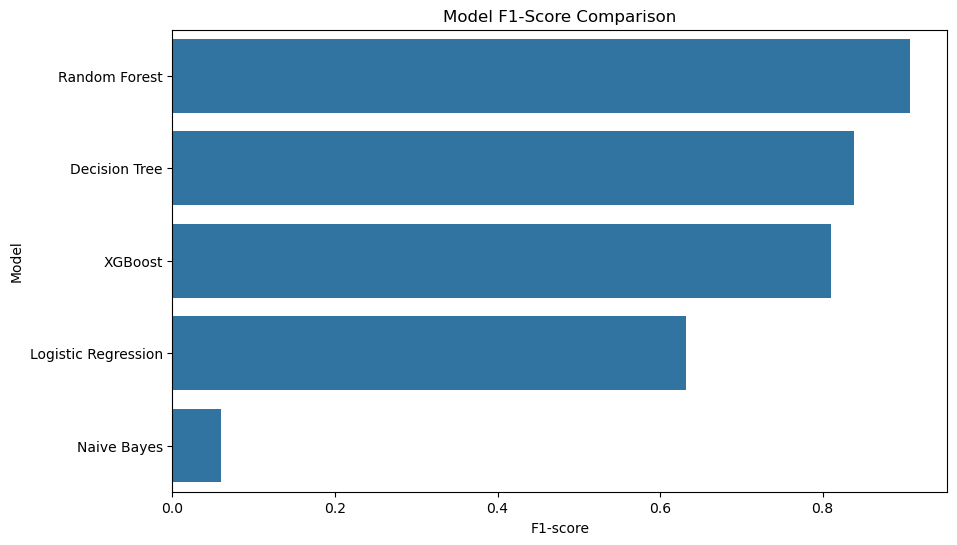

In [47]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(10, 6))
sns.barplot(x='F1-score', y='Model', data=results_df.sort_values('F1-score', ascending=False))
plt.title('Model F1-Score Comparison')
plt.show()

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

sample_size = int(0.2 * len(X_train))
X_train_sample = X_train.iloc[:sample_size]
y_train_sample = y_train[:sample_size]

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rand_search.fit(X_train_sample, y_train_sample)

best_rf = rand_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Tuning for Random Forest")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("Best Parameters:", rand_search.best_params_)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Tuning for Random Forest
Accuracy : 0.9076
Precision: 0.9082
Recall   : 0.9076
F1-score : 0.9064
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

Confusion Matrix:
[[37647  4543    13     0    12    11   142]
 [ 2550 53637   245     1    66   137    25]
 [    0   260  6600    40     3   248     0]
 [    0     0   126   403     0    20     0]
 [   34   792    33     0  1032     8     0]
 [    6   270   592    22     1  2582     0]
 [  500    42     0     0     0     0  3560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     42368
           1       0.90      0.95      0.92     56661
           2       0.87      0.92      0.89      7151
           3       0.86      0.73      0.79       549
           4       0.93      0.54      0.69      1899
           5       0.86      0.

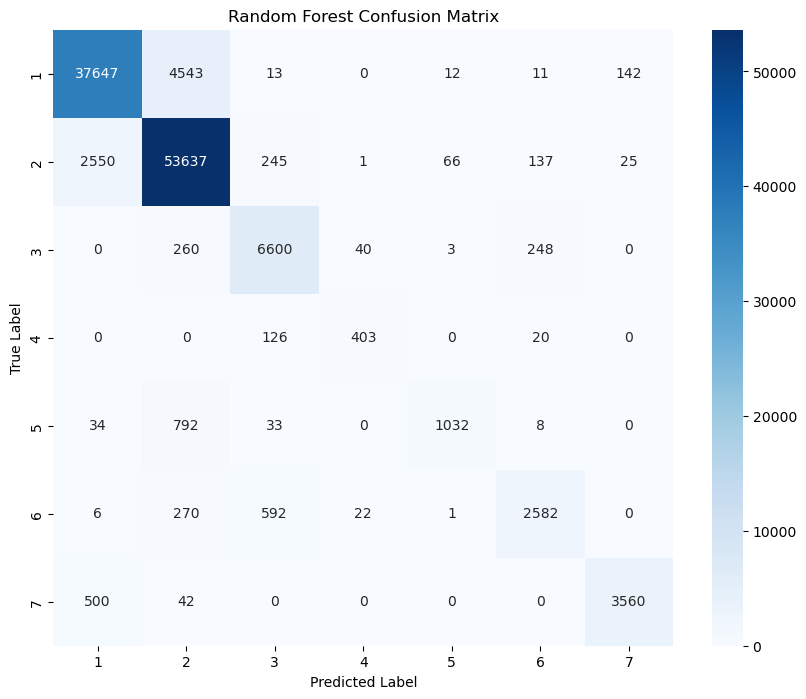

In [49]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
import joblib

joblib.dump(best_rf, 'forest_cover_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pt, 'power_transformer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']